# Introduction
This document gives a very brief introduction to the idea of finitely-presented groups and how to work with them in GAP.

[Group Theory Preliminaries](#group-theory)<br>
[Presentations of Group](#presentations)<br>
[Finitely-Presented Groups](#fpg)<br>

#### The GAP code
Before diving in, the folders above give a library of finitely-presented groups by presentations, focusing on special linear groups. In addition there is code to find bounds on the second homology of finitely-presented groups and find generators in some cases.

The code in `Algorithms.g` requires the GAP package [kbmag](https://github.com/gap-packages/kbmag). 

- The special linear group presentation is in Anton, "Homological symbols and the Quillen conjecture" - https://arxiv.org/abs/0804.3553.
- The code and some implementations are found in Roberts, "An algorithm for low dimensional group homology" - https://arxiv.org/abs/0901.2610, and "Generators for Group Homology and a Vanishing Conjecture" - https://arxiv.org/abs/2009.04069.

### Group Theory Preliminaries <a name="group-theory"></a>
Familiarity with only a first semester undergraduate class in abstract algebra is assumed. Specifically, familiarity with groups, normal subgroups, and quotient groups is assumed. It's also assumed that the reader is familiar with the basic functions of GAP. 

Let $X$ be a set and define the set of "inverse" symbols $X^{-1} = \{ x^{-1} : x \in X\}.$ Let $A = X \cup X^{-1}$ and call a **word** in X a product of elements in A. The word with no elements is called the **empty word**. As an example, if $X=\{x,y,z\}$ then $A=\{x,y,z,x^{-1}, y^{-1}, z^{-1}\}$, and some words in $X$ are $xyz, y^2z^{-3}x,$ and $z^3x$.

Notice that we've written the same element concatenated with itself using an exponent, i.e., $xx = x^2.$. In a similar vein, if we ever have an element of $X$ beside its corresponding inverse from $X^{-1}$, we simply the word by canceling them out. A word in which all exponents and canceling is done is called a **reduced word**.

Here's an example of reducing a word using $X$ and $A$ as above.

$$xxzz^{-1}xyyy^{-1} \stackrel{\text{reduction}}\longrightarrow x^3y$$

The **free group on $X$**, denoted $F(X)$ or $F_X$ is the group of reduced words in $X$ with the operation given by concatenation followed by any necessary reductions, and identity the empty word. This is also called the free group generated by $X$.

**Theorem:** Free groups satisfy the following universal property. If $F(X)$ is the group group on $X$, and $f: X \to G$ is a function form $X$ to a group $G$, then there is a unique homomorphism from $g: F(X) \to G$ that makes the following diagram commute. 

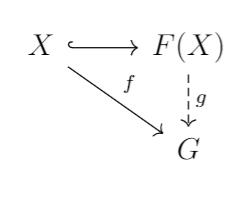

This implies that the functions $X \to G$ are in a one-to-one correpspondence with homomorophisms $F(X) \to G$.

**Theorem:** Every group is a quotient of a free group.

**Proof:** Let $X$ be a subset of $G$ such that $X$ is a generating set of $G$, i.e., $\langle X \rangle =G$. (This always exists--you can just let $X=G$ as sets.) There is a function $\phi:X \to G$, $x \mapsto x$, which extends to a homomorphism $\phi': F(X) \to G$. Since $\langle X \rangle = G$ we have that $\phi'$ is surjective so the First Isomorphism Theorem gives that $\displaystyle \frac{F(X)}{\ker{\phi'}} \cong G$.$_\square$

### Presentations of Groups <a name="presentations"></a>

Let $F(X)$ be the free group on a set $X$, and let $R$ be some set of words in $X$. The **normal closure** of $R$, denoted $\overline{\langle R \rangle }$ is the smallest normal subgroup of $F(X)$ that contains $R$. Equivalently, the normal closure of $R$ is the intersection of all normal subgroups of $G$ that contain $R$. That is,
$$ \overline{\langle R \rangle} =  \bigcap_{\substack{N \lhd F(X)\\ R \subset N}} N.$$
The group with presenation $\langle X | R \rangle$ is the quotient group 
$ \langle X | R \rangle = \displaystyle \frac{F(X)}{\overline{ \langle R \rangle}}.$

The elements of $X$ are called **generators** of $G = \langle X | R \rangle$, the elements of $\overline{ \langle R \rangle}$ are the **relators** of $G$, and the elements of $R$ are the **defining relators** of $G$. An equation of elements in $G$, $w_1 = w_2$ is called a **relation**. Note that $w_1=w_2$ is a relation if and only if $w_1w_2^{-1}$ is a relator.

An important type of relation is the **commutator** $[x,y]=xyx^{-1}y^{-1}$. Note that if $[x,y]=1$, then $xy=yx$. That is the elements $x$ and $y$ commute.

It's important to remember that the elemetns of $G = \langle X | R \rangle$ are actually cosets $wN$, where $w \in F(X)$ and $N$ is the normal closure of $R$. But, as we've done above, it's typical to abuse notation as just $w$ as the element of $G$. To be precise, the label $w$ can be

- A word in $A = X \cup X^{-1}$
- An element in the group $F(X)$
- A coset $wN$ in $\langle X | R \rangle$

#### Examples
1. Let $X= \{a,b,c\}$ and $R=\{a^2, (ab)^3, a^4c\}$. We can make the group with presentation $\langle a,c,b \mid a^2, (ab)^3, a^4c \rangle$. Note that we can write the same group (non-uniquely!) using corresponding relations, $\langle a,c,b \mid a = a^{-1}, (ab)^3, a^4 = c^{-1} \rangle$.
2. $\langle X \rangle = \langle X | \rangle = F(X)$, where $R = \varnothing$.
3. For $k \ne 0$, $\langle x \mid x^k \rangle \cong C_k$ the cyclic group with $k$ elements.

**Theorem:** Every group has a presentation.

**Proof:** For $G$ a group, choose a set $X \subset G$ such that $\langle X \rangle = G$. Then the function $f:X \to G$, $f(x)=x$ for all $x \in X$, extends to a homomorphism $f':F(X) \to G$. As in the theorem earlier, this is surjective, so the First Isomorphism Theorem gives that 
$\displaystyle \frac{F(X)}{\ker{f'}} \cong G$. Pick $R \subset \ker{f'}$ such that $N = \langle R \rangle$ (for example, just take $R=N$). Then $G \cong \langle X \mid R \rangle$.$_\square$

### Finitely-Presented Groups <a name="fpg"></a>
A group $G$ is called **finitely-presented** if it has a presentation $\langle X \mid R \rangle$ with $X$ and $R$ finite sets. (Note that finite groups are finitely-presented - [see discussion here](https://math.stackexchange.com/questions/1677579/proof-of-every-finite-group-is-finitely-presented).)


#### Finitely-Presented Groups in GAP
(The following is adapted or quoted from [the GAP manual](https://www.gap-system.org/Manuals/doc/ref/chap47.html)

To create a finitely-presented group in GAP do the following. This code takes $X=\{a,b\}$ and $R=\{a^2, b^3, (ab)^5\}$.

    gap> F := FreeGroup( "a", "b" );
    <free group on the generators [ a, b ]>
    gap> R := [ F.1^2, F.2^3, (F.1*F.2)^5 ];;
    gap> G := F/R;
    <fp group on the generators [ a, b ]>
    
Notice that GAP doesn't automatically let you call the generators by their original names which makes things tedious. You can fix this by using the `AssignGeneratorVariables()` command.

    gap> F := FreeGroup( "a", "b" );;
    gap> AssignGeneratorVariables(F);
    #I Assigned the global variables [ a, b ]
    gap> R := [ a^2, b^3, (a*b)^5 ];;
    gap> G := F/R;
    <fp group on the generators [ a, b ]>
    
Another way to build a finitely-presented group is to use the `ParseRelators()` command. The following gives the same group (using different labels for the generators).

    gap> FF := FreeGroup( "x", "y" );;
    gap> AssignGeneratorVariables(FF);;
    gap> GG := FF/ParseRelators(FF, "x^2, y^3, (x*y)^5");
    <fp group on the generators [ x, y ]>

One additional way to make a finitely-presented group is to use *relations* rather than *relators*. Again, using the presentation $\langle X \mid R \rangle$ for $X=\{a,b\}$ and $R=\{a^2, b^3, (ab)^5\}$, notice that we can make the equations 

- $a^2 = 1$
- $b^3 = a^2$
- $(ab)^3 = (ab)^{-2}$

We can tell GAP to use these relations by putting each equation in a sublist of $R$. We're using the same free group $F$ from above.

    gap> R1 := [[a^2, a^0], [b^3, a^2], [(a*b)^2, (a*b)^(-1)]];
    [ [ a^2, <identity ...> ], [ b^3, a^2 ], [ (a*b)^3, (b^-1*a^-1)^2 ] ]
    gap> G1 := F/R1;
    <fp group on the generators [ a, b ]>

It's clear that `G` and `G1` are the same groups since the relations for `G1` were generated by the relators of `G`. But GAP can't figure this out directly. The GAP command `IsomorphismGroups()` will almost always fail for finitely-presented groups due to annoyance of the [Word Problem](https://en.wikipedia.org/wiki/Word_problem_for_groups). We can investigate some things like the sizes of the groups, the abelian invariants, but most of the time these can only show that two finitely-presented groups are **not** isomorphic, not show that they are. 

    gap> Size(G); Size(G1);
    60
    60
    gap> AbelianInvariants(G); AbelianIvariants(G1);
    [ ]
    [ ]
    
So we know both groups have order 60 and are perfect (that is, if you mod by the commutator subgroup the result is the trivial group). We're in luck! There is only one perfect group of order 60 up to isomorphism. So we know that $G \cong G1 \cong A_5$, the alternating group of degree 5. And in this case GAP is able to find isomorphisms.

    gap> A5:=AlternatingGroup(5);
    Alt( [ 1 .. 5 ] )
    gap> IsomorphismGroups(G, A5);
    [ a^-1*(b*a)^2*b^2*(b*a)^2, (b*a*b)^2*a*b ] -> [ (2,4)(3,5), (1,2,3) ]
    gap> IsomorphismGroups(G1, A5);
    [ b^-1*a^-1*b^-2*a^-1*b*a*(b*a*b)^4, b*a*(b*a*b)^2 ] -> [ (2,4)(3,5), (1,2,3) ]

That is, using $G$, in this case, the homomorphism $G \to A_5$ taking 

- $a^{-1}(ba)^2b^2(ba)^2 \mapsto (2,4)(3,5)$
- $(bab)^2ab \mapsto (1,2,3)$

is an isomorphism.


If we hadn't been lucky we could have tried `SimplifiedFpGroup()` and hoped that GAP found equivalent ways to express the groups. `SimplifiedFpGroup()` uses [Tietze transformations](https://en.wikipedia.org/wiki/Tietze_transformations) to make an isomorphic finitely-presented group with hopefully fewer generators and relators. We can examine the new presentation by checking the generators and relators of the simplified finitely-presented groups.

    gap> H:=SimplifiedFpGroup(G); H1:=SimplifiedFpGroup(G1);
    <fp group on the generators [ a, b ]>
    <fp group on the generators [ a, b ]>
    gap> GeneratorsOfGroup(H);
    [ a, b ]
    gap> RelatorsOfFpGroup(H);
    [ a^2, b^3, (a*b)^5 ]
    gap> GeneratorsOfGroup(H1);
    [ a, b ]
    gap> RelatorsOfFpGroup(H1);
    [ a^2, b^3, (a*b)^5 ]

In [1]:
!jupyter nbconvert --to html finitely-presented-groups.ipynb

[NbConvertApp] Converting notebook finitely-presented-groups.ipynb to html
[NbConvertApp] Writing 588662 bytes to finitely-presented-groups.html
